In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns 
import matplotlib.pyplot as plt
import re 
import warnings
warnings.filterwarnings('ignore')
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/datapregr1/__results__.html
/kaggle/input/datapregr1/__notebook__.ipynb
/kaggle/input/datapregr1/__output__.json
/kaggle/input/datapregr1/final_merged_table.csv
/kaggle/input/datapregr1/custom.css
/kaggle/input/datapregr1/__results___files/__results___20_1.png
/kaggle/input/datapregr1/__results___files/__results___55_3.png
/kaggle/input/datapregr1/__results___files/__results___55_1.png
/kaggle/input/datapregr1/__results___files/__results___103_1.png
/kaggle/input/datapregr1/__results___files/__results___122_5.png
/kaggle/input/datapregr1/__results___files/__results___15_0.png
/kaggle/input/datapregr1/__results___files/__results___29_3.png
/kaggle/input/datapregr1/__results___files/__results___89_1.png
/kaggle/input/datapregr1/__results___files/__results___95_2.png
/kaggle/input/datapregr1/__results___files/__results___55_4.png
/kaggle/input/datapregr1/__results___files/__results___55_13.png
/kaggle/input/datapregr1/__results___files/__results___31_1.png
/kaggle/input/data

# 1. Feature selection using selectKbest

## 1.1 Selecting categorical features using chi square

In [2]:
# data from previous file
final = pd.read_csv("../input/datapregr1/final_merged_table.csv")

In [3]:
encoded_cat = final.filter(regex = "^FLAG_").select_dtypes(np.number)
city = final.filter(regex = "CITY_")

In [4]:
from sklearn.preprocessing import OrdinalEncoder
def prepare_categorical(x):
    oe = OrdinalEncoder()
    oe.fit(x)
    x_new = oe.transform(x)
    return x_new

In [5]:
cat = final.select_dtypes(include = object)
encoded = prepare_categorical(final[cat.columns])
for i in range(len(cat.columns)):
    cat[cat.columns[i]] = encoded[: ,i]
cat = pd.concat([cat, encoded_cat, city], axis = 1)
cat

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,...,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY
0,0.0,1.0,0.0,1.0,6.0,7.0,4.0,3.0,1.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,4.0,1.0,1.0,1.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,1.0,1.0,6.0,7.0,4.0,3.0,1.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,6.0,7.0,4.0,0.0,1.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,1.0,6.0,7.0,4.0,3.0,1.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0.0,1.0,0.0,0.0,6.0,7.0,4.0,2.0,5.0,14.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
307507,0.0,0.0,0.0,1.0,6.0,3.0,4.0,5.0,1.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
307508,0.0,0.0,0.0,1.0,6.0,7.0,1.0,2.0,1.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
307509,0.0,0.0,0.0,1.0,6.0,1.0,4.0,1.0,1.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [6]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
target = final["TARGET"]
features = cat.fillna(cat.max() + 1, downcast='infer')
selector = SelectKBest(score_func=chi2, k=10)
selector.fit(features, target)
list(features.columns[selector.get_support()])

['CODE_GENDER',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'OCCUPATION_TYPE',
 'ORGANIZATION_TYPE',
 'HOUSETYPE_MODE',
 'EMERGENCYSTATE_MODE',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY']

In [7]:
pd.Series(index = features.columns, data = selector.pvalues_).sort_values(ascending = True)

ORGANIZATION_TYPE              0.000000e+00
NAME_INCOME_TYPE              2.537261e-205
HOUSETYPE_MODE                5.156737e-161
REG_CITY_NOT_WORK_CITY        7.571021e-136
CODE_GENDER                   9.985791e-134
EMERGENCYSTATE_MODE           4.938018e-124
REG_CITY_NOT_LIVE_CITY        1.604975e-123
NAME_EDUCATION_TYPE           7.245723e-108
OCCUPATION_TYPE                8.122390e-84
LIVE_CITY_NOT_WORK_CITY        5.686613e-60
NAME_CONTRACT_TYPE             1.038579e-59
NAME_HOUSING_TYPE              1.018930e-57
FLAG_DOCUMENT_6                8.003501e-52
WALLSMATERIAL_MODE             2.106698e-48
FLAG_WORK_PHONE                1.778407e-45
FLAG_DOCUMENT_3                4.986738e-40
FLAG_PHONE                     4.387368e-29
FLAG_OWN_CAR                   7.333211e-23
FONDKAPREMONT_MODE             9.113068e-17
FLAG_DOCUMENT_13               1.436313e-10
FLAG_DOCUMENT_16               1.467559e-10
FLAG_DOCUMENT_14               1.602932e-07
FLAG_DOCUMENT_18               1

<AxesSubplot:>

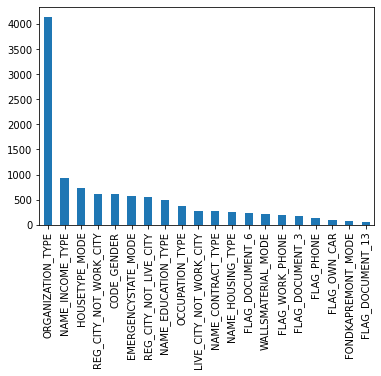

In [8]:
pd.Series(index = features.columns, data = selector.scores_).sort_values(ascending = False)[0:20].plot(kind = "bar")

## 1.2 Select numerical features using ANOVA

In [9]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

numeric = final.select_dtypes(include = np.number).drop(["Unnamed: 0", "SK_ID_CURR", "TARGET", "SK_ID_PREV", "DEBT_OVER_CREDIT", "SK_DPD_mean_pos", "SK_DPD_DEF_mean_pos"], axis = 1)
target = final["TARGET"]
features = numeric.fillna(numeric.mean(), downcast='infer').round(3)
features = features.drop(encoded_cat.columns, axis = 1)
features = features.drop(city.columns, axis = 1)
selector = SelectKBest(score_func=f_classif, k=20)
selector.fit(features, target)
selected = list(features.columns[selector.get_support()])
selected

['REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'REGION_RATING_CLIENT',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'DAYS_LAST_PHONE_CHANGE',
 'DAYS_CREDIT_ENDDATE',
 'DAYS_CREDIT_UPDATE',
 'NUM_INSTALMENT_NUMBER_mean_installment',
 'DAYS_INSTALMENT_mean_installment',
 'DAYS_ENTRY_PAYMENT_mean_installment',
 'CNT_DRAWINGS_CURRENT_max_credit_card',
 'HOUR_APPR_PROCESS_START_prev',
 'DAYS_DECISION_prev',
 'DAYS_FIRST_DRAWING_prev',
 'DAYS_FIRST_DUE_prev']

In [10]:
scores = selector.scores_

In [11]:
scores

array([1.13249930e+02, 4.87571051e+00, 2.83875387e+02, 5.05208606e+01,
       4.28093978e+02, 1.89397609e+03, 6.22071742e+02, 5.42753029e+02,
       8.16396507e+02, 1.34008685e+02, 1.07049125e+03, 1.79686319e+02,
       9.56110796e+00, 1.48195976e+01, 3.05386216e+03, 8.11017452e+03,
       7.81066362e+03, 1.16352752e+02, 5.83823987e+01, 1.27775230e+01,
       4.43452996e+01, 2.69317281e+01, 1.45281037e+02, 4.80787137e+01,
       2.62715044e+02, 9.65474602e+01, 1.33889301e+01, 7.44474677e-01,
       2.27625002e+01, 2.55977889e+01, 3.19606416e+02, 9.40487178e+02,
       1.91859362e-01, 1.86734503e+00, 1.49144663e-01, 3.96959951e+01,
       1.05198838e+00, 1.01448890e+02, 5.53658904e+02, 1.06183227e+00,
       1.00889820e+02, 1.00355762e-01, 3.04214079e+01, 1.20786801e+03,
       1.58003615e-01, 1.29245660e+01, 5.00499367e+01, 4.16516351e+00,
                  nan, 5.70144411e+02, 6.15131300e+02, 6.14547248e+02,
       2.04274591e+00, 2.52243362e+00, 1.70825128e+00, 1.36546768e+01,
      

<AxesSubplot:>

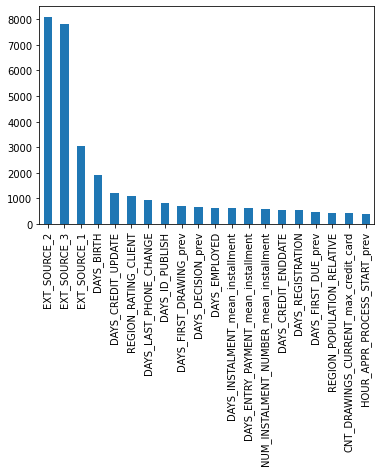

In [12]:
pd.Series(index = features.columns, data = selector.scores_).sort_values(ascending = False)[0:20].plot(kind = "bar")

# 2. Feature analysis

## 2.1 DAYS_BIRTH

In [13]:
age_bin = final[['TARGET', 'DAYS_BIRTH']]
age_bin['YEAR_OLD'] = -final['DAYS_BIRTH']/365

# Phân chia khoảng tuổi thanh 10 khoảng bằng nhau
age_bin['DAYS_BIN'] = pd.cut(age_bin['YEAR_OLD'], bins = np.linspace(20, 70, num = 11))
age_bin['YEAR_OLD'].max()

69.12054794520547

Text(0.5, 1.0, 'Amount of delinquency by Age group')

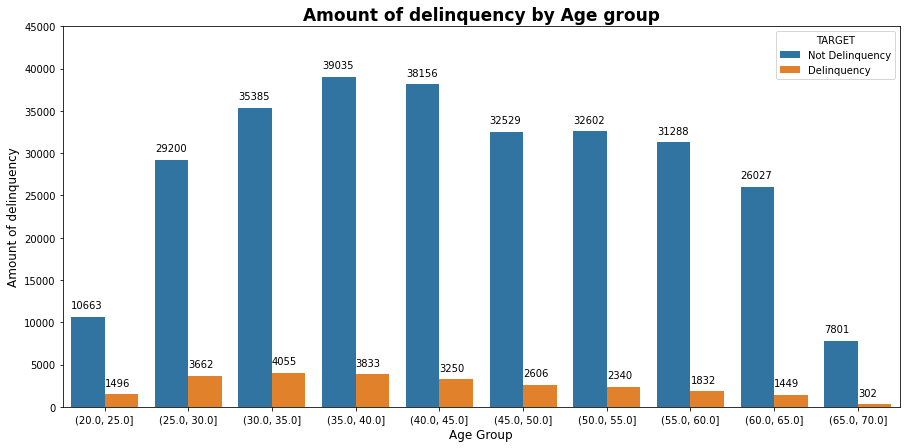

In [14]:
fig,ax = plt.subplots(figsize = (15, 7))
sns.countplot(data=age_bin,x='DAYS_BIN',hue='TARGET')
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate('{}'.format(int(height)), (x, height + 1000))
ax.set_yticks([each for each in range(0, 50000, 5000)])
ax.set_xlabel('Age Group', size=12)
ax.set_ylabel('Amount of delinquency', size=12)
ax.legend(title='TARGET',labels=['Not Delinquency', 'Delinquency'])
ax.set_title('Amount of delinquency by Age group', size=17, weight='bold')

* DAYS_BIRTH is a continuous variable with a range of 20 - 70.
* After plotting paid/not paid analysis by age group, we found that people aged 30-35 have the highest tendency to default on debt.
* People aged 35-40 have the highest repayment rate, so people in this group are reliable customers for loans

## 2.2 NAME_CONTRACT_TYPE

In [15]:
group_by_target = final[['TARGET', 'NAME_CONTRACT_TYPE']].groupby('TARGET')
group_default_by_contract = group_by_target['NAME_CONTRACT_TYPE'].value_counts(normalize=True)
#group_default_by_contract

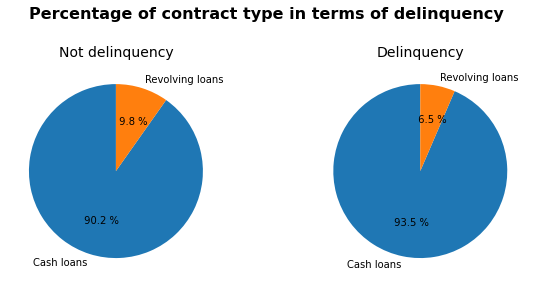

In [16]:
fig, (ax, ax1) = plt.subplots(ncols = 2, figsize=(10,4))
ax.pie(group_default_by_contract[0], labels = ['Cash loans', 'Revolving loans'], autopct ='% 1.1f %%', startangle = 90)
ax.set_title('Not delinquency', size=14)
ax1.pie(group_default_by_contract[1], labels = ['Cash loans', 'Revolving loans'], autopct ='% 1.1f %%', startangle = 90)
ax1.set_title('Delinquency', size=14)
ax.text(x = -1, y=1.75, s="Percentage of contract type in terms of delinquency", size = 16, weight = "bold")
plt.show()

* There is a clear difference between cash loans and revolving loans. The majority of deliquency is cash loans (93,5%).
* Cash loans are more risky.

## 2.3 FLAG_OWN_CAR

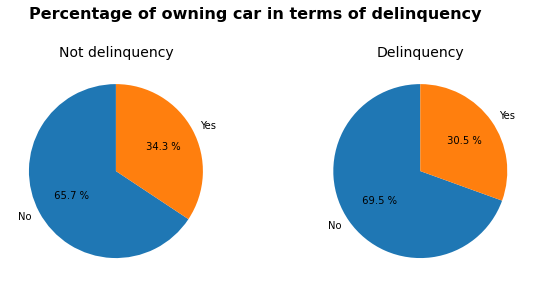

In [17]:
group_by_target = final[['TARGET', 'FLAG_OWN_CAR']].groupby('TARGET')
group_default_by_car = group_by_target['FLAG_OWN_CAR'].value_counts(normalize=True)
fig, (ax, ax1) = plt.subplots(ncols = 2, figsize=(10,4))
ax.pie(group_default_by_car[0], labels = ['No', 'Yes'], autopct ='% 1.1f %%', startangle = 90)
ax.set_title('Not delinquency', size=14)
ax1.pie(group_default_by_car[1], labels = ['No', 'Yes'], autopct ='% 1.1f %%', startangle = 90)
ax1.set_title('Delinquency', size=14)
ax.text(x = -1, y=1.75, s="Percentage of owning car in terms of delinquency", size = 16, weight = "bold")
plt.show()

* People with no cars have more repayment difficulties.

## 2.4 HOUSE_TYPE_MODE

Text(0.5, 1.0, 'Amount of delinquency by the type of house')

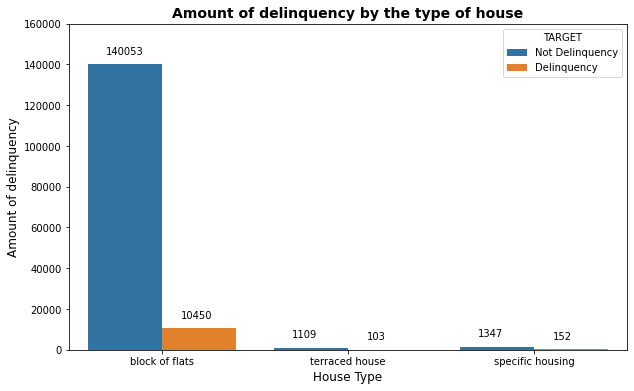

In [18]:
fig,ax = plt.subplots(figsize = (10, 6))
sns.countplot(data=final,x='HOUSETYPE_MODE',hue='TARGET')
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate('{}'.format(int(height)), (x+0.1, height + 5000))
ax.set_yticks([each for each in range(0, 180000, 20000)])
ax.set_xlabel('House Type', size=12)
ax.set_ylabel('Amount of delinquency', size=12)
ax.legend(title='TARGET',labels=['Not Delinquency', 'Delinquency'])
ax.set_title("Amount of delinquency by the type of house", size = 14, weight = "bold")

Text(0.5, 1.0, 'Amount of delinquency by days credit update')

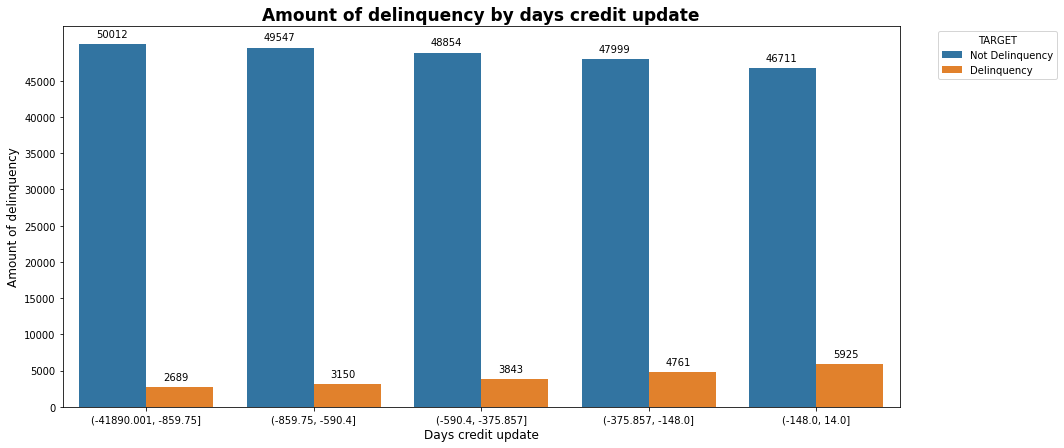

In [19]:
credit_bin = final[['TARGET', 'DAYS_CREDIT_UPDATE']]
credit_bin['DAYS_BIN'] = pd.qcut(credit_bin['DAYS_CREDIT_UPDATE'], q = 5)

fig,ax = plt.subplots(figsize = (15, 7))
sns.countplot(data=credit_bin,x='DAYS_BIN',hue='TARGET')
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate('{}'.format(int(height)), (x+0.1, height + 1000))
ax.set_yticks([each for each in range(0, 50000, 5000)])
ax.set_xlabel('Days credit update', size=12)
ax.set_ylabel('Amount of delinquency', size=12)
ax.legend(title='TARGET',labels=['Not Delinquency', 'Delinquency'], bbox_to_anchor=(1.04, 1))
ax.set_title('Amount of delinquency by days credit update', size=17, weight='bold')

## 2.5 GENDER 

In [20]:
def delete_spine_top(ax):
    ax.spines["top"].set_visible(False)
    
def delete_spine2(ax): # top and right spines
    for i in ["top", "right"]:
        ax.spines[i].set_visible(False)

In [21]:
grouped_by_target = final.groupby("TARGET")
count_default_by_gender = grouped_by_target["CODE_GENDER"].value_counts(normalize = True)

Text(0.5, 1.0, 'Defaulted')

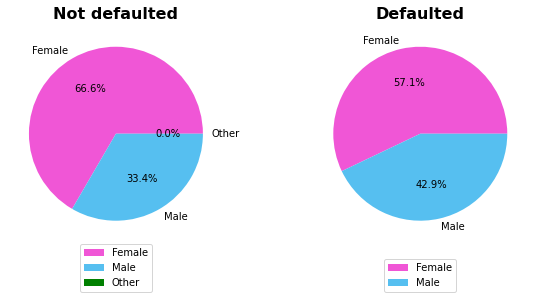

In [22]:
fig,(ax,ax1) = plt.subplots(ncols = 2, figsize = (10,4))
ax.pie(count_default_by_gender[0], labels = ["Female", "Male", "Other"], autopct='%1.1f%%', textprops=dict(color="black"), colors = ["#f056d6", "#56bff0", "green"])
ax.legend(loc = 'lower center', bbox_to_anchor=(0.5, -0.25))
ax.set_title("Not defaulted", weight = "bold", size = 16)
ax1.pie(count_default_by_gender[1], labels = ["Female", "Male"], autopct='%1.1f%%', textprops=dict(color="black"), colors = ["#f056d6", "#56bff0", "green"])
ax1.legend(loc = 'lower center', bbox_to_anchor=(0.5, -0.25))
ax1.set_title("Defaulted", weight = "bold", size = 16)

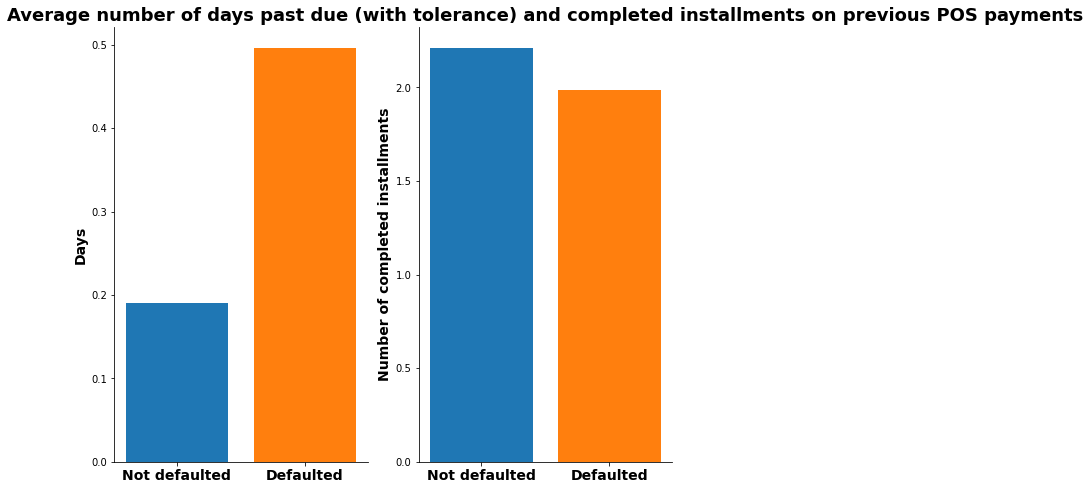

In [23]:
pos = pd.read_csv("../input/home-credit-default-risk/POS_CASH_balance.csv")
pos_grouped_by_id_curr = pos.groupby("SK_ID_CURR")
# number of times the payment was paid completely
no_of_completed_installent = pos_grouped_by_id_curr["NAME_CONTRACT_STATUS"].apply(lambda x: (x=='Completed').sum()).reset_index(name='n_complete')
# total number times the payment was late
no_of_late_installent = pos_grouped_by_id_curr["SK_DPD_DEF"].apply(lambda x: (x > 0).sum()).reset_index(name='n_late')

temp = final.copy()
temp = final.merge(pos_grouped_by_id_curr["SK_DPD_DEF"].mean(), right_index = True, left_on = "SK_ID_CURR")
temp = temp.merge(no_of_late_installent, right_on = "SK_ID_CURR", left_on = "SK_ID_CURR")
temp = temp.merge(no_of_completed_installent, right_on = "SK_ID_CURR", left_on = "SK_ID_CURR")
mean_n_complete = temp.groupby("TARGET")["n_complete"].mean()
mean_days_pays_late_pos = temp.groupby("TARGET")["SK_DPD_DEF"].mean()
mean_days_pays_late_pos
fig, (ax, ax1) = plt.subplots(ncols = 2, figsize = (10, 8))
ax.bar(mean_days_pays_late_pos.index, mean_days_pays_late_pos.values, label = "Not defaulted")
ax.bar(mean_days_pays_late_pos.index[1], mean_days_pays_late_pos.values[1], label = "Defaulted")
ax.set_xticks([0, 1], ["Not defaulted", "Defaulted"], weight = "bold", size = 14)
ax.set_ylabel("Days", weight = "bold", size = 14)
# ax.set_title("Average number of  on previous POS payments", size = 18, weight = "bold")
ax1.bar(mean_n_complete.index , mean_n_complete.values, label = "Not defaulted")
ax1.bar(mean_n_complete.index[1], mean_n_complete.values[1], label = "Defaulted")
ax1.set_ylabel("Number of completed installments", weight = "bold", size = 14)
ax1.set_title("Average number of days past due (with tolerance) and completed installments on previous POS payments", size = 18, weight = "bold")
ax1.set_xticks([0, 1], ["Not defaulted", "Defaulted"], weight = "bold", size = 14)
delete_spine2(ax)
delete_spine2(ax1)

## 2.6 External data sources

In [24]:
score_from_ext = final.filter(regex = "EXT|TARGET")
mean_score_by_target = score_from_ext.groupby("TARGET").mean()

Text(0.5, 1.0, 'Average credit scores by external sources')

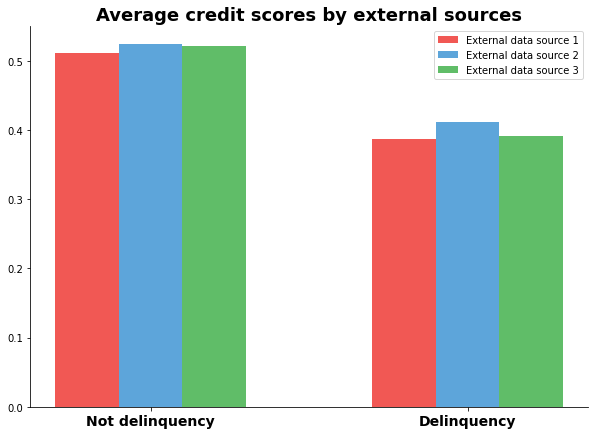

In [25]:
fig,ax = plt.subplots(figsize = (10, 7))
colors = ["#f15854", "#5da5da", "#60bd68"]
labels = ["External data source 1", "External data source 2", "External data source 3"]
for i in range(len(mean_score_by_target.columns)):
    ax.bar(mean_score_by_target.index[0] + (i * (1/4)) - 0.25, mean_score_by_target[mean_score_by_target.columns[i]][0], width = 1/4, color = colors[i], label = labels[i])
    ax.bar(mean_score_by_target.index[1] + (i * (1/4)), mean_score_by_target[mean_score_by_target.columns[i]][1], width = 1/4, color = colors[i], label = labels[i])

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys())
ax.set_xticks([0, 1.25], labels = ["Not delinquency", "Delinquency"], size = 14, weight = "bold")
delete_spine2(ax)
ax.set_title("Average credit scores by external sources", size = 18, weight = "bold")

* Customers that gets low credit stores in other institutions are more likely to have payment difficulty

## 2.7 Amount of credit in current application and amount of credit in previous ones

In [26]:
temp = final.copy()
temp["log_AMT_CREDIT_CURR"] = np.log1p(temp["AMT_CREDIT"])
temp["AMT_CREDIT_prev"] = np.exp(temp["log_AMT_CREDIT_prev"]) - 1
credit_curr_prev = temp[["log_AMT_CREDIT_prev", "log_AMT_CREDIT_CURR", "AMT_CREDIT_prev", "AMT_CREDIT", "TARGET"]]
credit_curr_prev_gr = credit_curr_prev.groupby("TARGET")

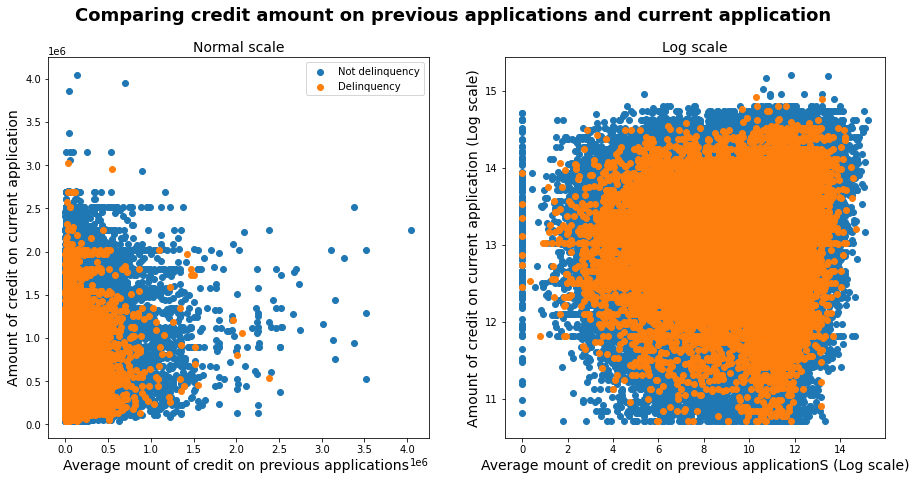

In [27]:
fig, (ax, ax1) = plt.subplots(ncols = 2, figsize = (15, 7))
for name, group in credit_curr_prev_gr:
    ax.scatter(group["AMT_CREDIT_prev"], group["AMT_CREDIT"], label=name)
    ax1.scatter(group["log_AMT_CREDIT_prev"], group["log_AMT_CREDIT_CURR"], label=name)
ax.set_xlabel("Average mount of credit on previous applications ", size = 14)
ax.set_ylabel("Amount of credit on current application", size = 14)
ax1.set_xlabel("Average mount of credit on previous applicationS (Log scale)", size = 14)
ax1.set_ylabel("Amount of credit on current application (Log scale)", size = 14)
fig.suptitle("Comparing credit amount on previous applications and current application", weight = "bold", size = 18)
ax.set_title("Normal scale", size = 14)
ax1.set_title("Log scale", size = 14)
ax.legend(["Not delinquency", "Delinquency"])

* Clients that applied for high credit values previously are less likely to pay late

## 2.8 Features related to address on city level

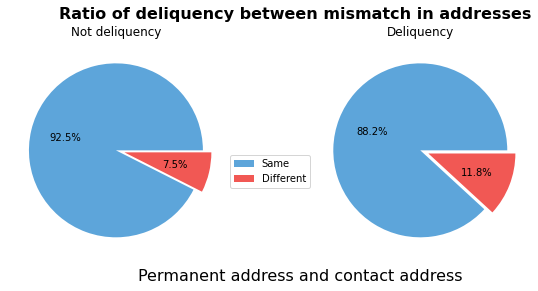

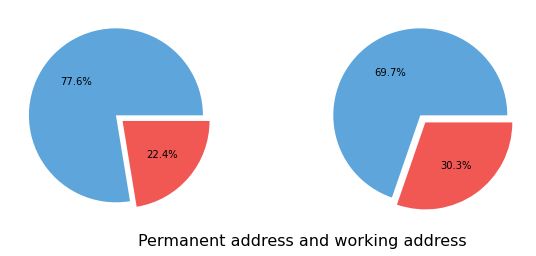

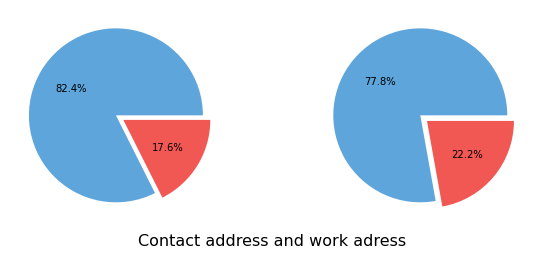

In [28]:
cols = ['REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY']
city_related = final[['REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', "TARGET"]]
city_related_gr = city_related.groupby("TARGET")
titles = ["Permanent address and contact address", "Permanent address and working address", "Contact address and work adress"]
for i in range(len(cols)):
        fig, (ax, ax1) = plt.subplots(ncols = 2, figsize = (10, 4))
        axes = (ax, ax1)
        temp = city_related.groupby("TARGET")[cols[i]].value_counts(normalize = True)
        for j in range(2):
            axes[j].pie(temp[j], autopct='%1.1f%%', colors = ["#5da5da", "#f15854"], textprops=dict(color="black"), explode = (0, 0.1))
        ax.text(x = 0.25, y = -1.5, s = titles[i], size = 16)
        if i == 0:
            fig.suptitle("Ratio of deliquency between mismatch in addresses",  fontsize=16, weight = "bold", y = 1, x = 0.55)
            ax.set_title("Not deliquency")
            ax1.set_title("Deliquency")
            ax.legend(["Same", "Different"], bbox_to_anchor = (1, 0.5))

## 2.9 Down Payment amount

In [29]:
temp = final.copy()
temp = temp.drop(temp[temp['log_AMT_DOWN_PAYMENT_prev'] == 0].index, axis = 0)
temp["AMT_DOWN_PAYMENT_prev"] = np.exp(temp["log_AMT_DOWN_PAYMENT_prev"]) - 1
downpayment_by_target = temp.groupby("TARGET")
mean_down_payment_rate = downpayment_by_target['RATE_DOWN_PAYMENT_prev'].mean()
mean_down_payment = downpayment_by_target['AMT_DOWN_PAYMENT_prev'].mean()

Text(0.5, 1.05, 'Down payment amount and down payment rate on previous application')

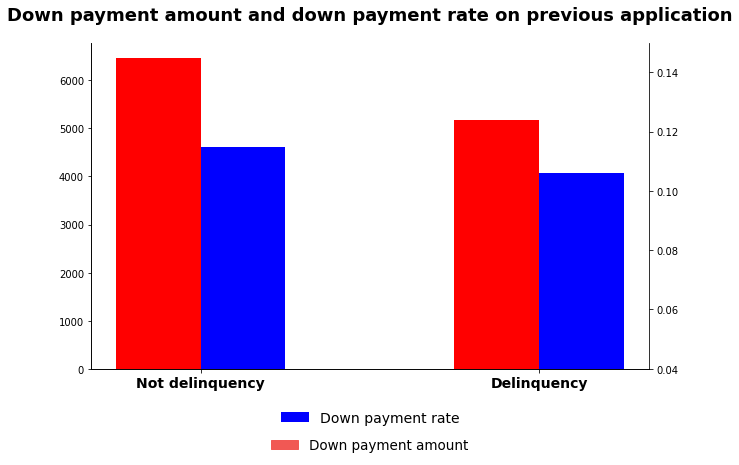

In [30]:
fig, ax = plt.subplots(figsize = (10, 6))

ax1 = ax.twinx()
ax1.set_ylim([0.04, 0.15])
for i in range(2):
    ax.bar(i, mean_down_payment[i], width = 0.25, label = "Down payment amount", color = "red")
    ax1.bar(i + 0.25, mean_down_payment_rate[i], width = 0.25, label = "Down payment rate", color = "blue")
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
leg = ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor = (0.5, -0.15), prop={'size': 14}, loc = "center", frameon=False)

ax.set_xticks([0.125, 1.125], labels = ["Not delinquency", "Delinquency"], size = 14, weight = "bold")

leg1 = ax1.legend(by_label.values(), ["Down payment amount"], bbox_to_anchor = (0.5, -0.235), prop={'size': 13.5}, loc = "center", frameon=False)
leg1.legendHandles[0].set_color('#f15854')
delete_spine_top(ax1)
delete_spine2(ax)
ax.set_title("Down payment amount and down payment rate on previous application",y = 1.05, size = 18, weight = "bold")

## 2.10 Ocupation type

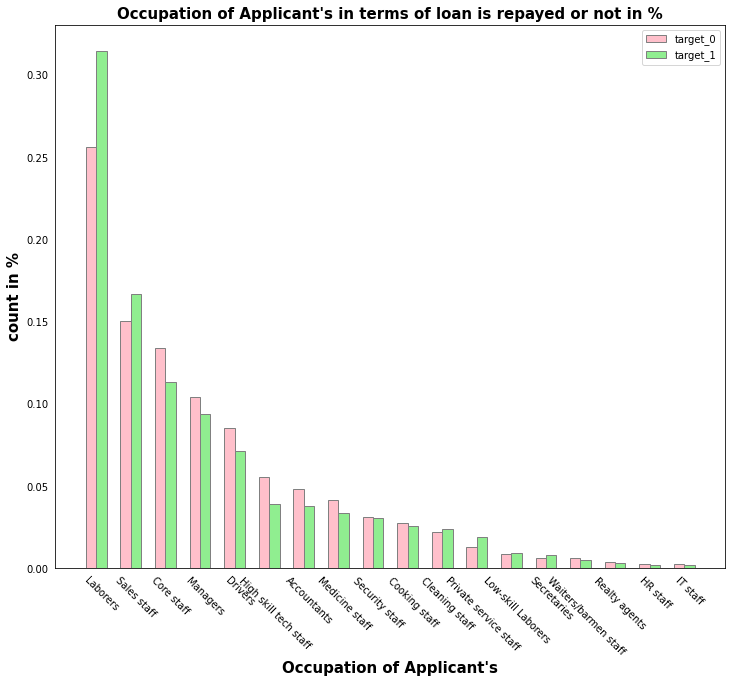

In [31]:
groupby_target = final.groupby('TARGET')['OCCUPATION_TYPE'].value_counts(normalize = True)
fig = plt.subplots(figsize =(12, 10))
index = groupby_target[0].index
barWidth = 0.3
value_0 = groupby_target[0].values  # cac gtri y
value_1 = groupby_target[1].values
# Set position of bar on X axis
br1 = np.arange(len(value_0))
br2 = [x + barWidth for x in br1]

# Make the plot
plt.bar(br1, value_0, color ='pink', width = barWidth, edgecolor ='grey', label ='target_0')
plt.bar(br2, value_1, color ='lightgreen', width = barWidth, edgecolor ='grey', label ='target_1')
# Xoa vach chia diem
plt.tick_params(left = False, bottom = False)
# Adding Xticks
plt.title("Occupation of Applicant's in terms of loan is repayed or not in %", fontweight ='bold', fontsize = 15)
plt.xlabel('Occupation of Applicant\'s', fontweight ='bold', fontsize = 15)
plt.ylabel('count in %', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(value_0))],index, rotation = -45)

plt.legend()
plt.show()

## 2.11 Client's education

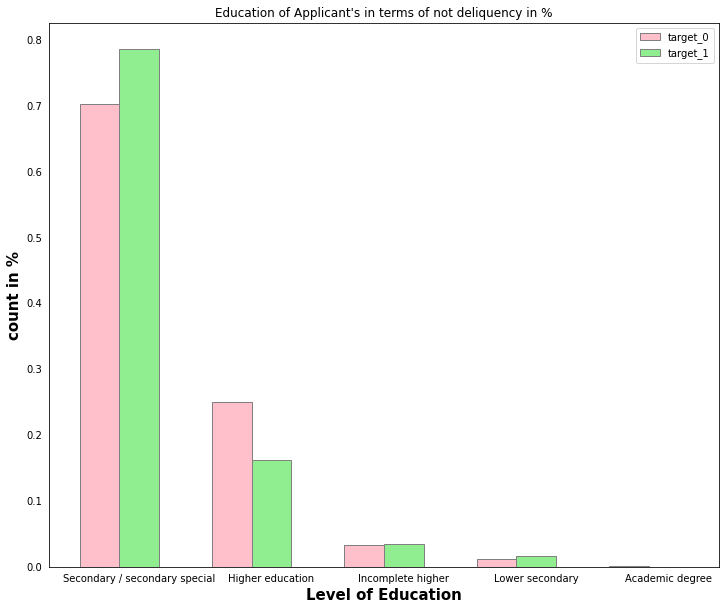

In [32]:
groupby_target = final.groupby('TARGET')['NAME_EDUCATION_TYPE'].value_counts(normalize = True)
fig = plt.subplots(figsize =(12, 10))
index = groupby_target[0].index
barWidth = 0.3
value_0 = groupby_target[0].values  # cac gtri y
value_1 = groupby_target[1].values
# Set position of bar on X axis
br1 = np.arange(len(value_0))
br2 = [x + barWidth for x in br1]

# Make the plot
plt.bar(br1, value_0, color ='pink', width = barWidth, edgecolor ='grey', label ='target_0')
plt.bar(br2, value_1, color ='lightgreen', width = barWidth, edgecolor ='grey', label ='target_1')
# Xoa vach chia diem
plt.tick_params(left = False, bottom = False)
# Adding Xticks
plt.title("Education of Applicant's in terms of not deliquency in %")
plt.xlabel('Level of Education', fontweight ='bold', fontsize = 15)
plt.ylabel('count in %', fontweight ='bold', fontsize = 15)

plt.xticks([r + barWidth for r in range(len(value_0))],index)

plt.legend()
plt.show()

## 2.12 Housing type

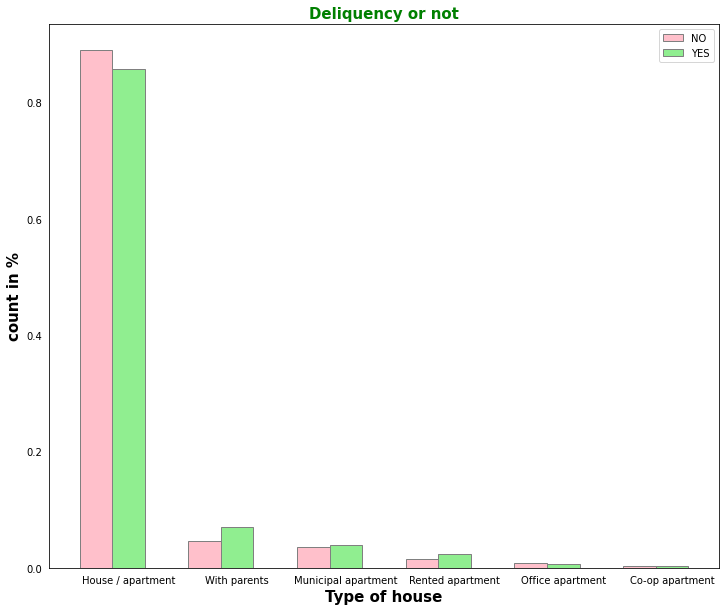

In [33]:
groupby_target = final.groupby('TARGET')['NAME_HOUSING_TYPE'].value_counts(normalize = True)
fig = plt.subplots(figsize =(12, 10))
index = groupby_target[0].index
barWidth = 0.3
value_0 = groupby_target[0].values  # cac gtri y
value_1 = groupby_target[1].values
# Set position of bar on X axis
br1 = np.arange(len(value_0))
br2 = [x + barWidth for x in br1]

# Make the plot
plt.bar(br1, value_0, color ='pink', width = barWidth, edgecolor ='grey', label ='NO')
plt.bar(br2, value_1, color ='lightgreen', width = barWidth, edgecolor ='grey', label ='YES')
# Xoa vach chia diem
plt.tick_params(left = False, bottom = False)
# Adding Xticks
plt.title('Deliquency or not', fontweight ='bold', fontsize = 15, color = 'green')
plt.xlabel('Type of house', fontweight ='bold', fontsize = 15)
plt.ylabel('count in %', fontweight ='bold', fontsize = 15)

plt.xticks([r + barWidth for r in range(len(value_0))],index)

plt.legend()
plt.show()

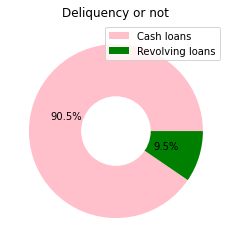

In [34]:
temp = final['NAME_CONTRACT_TYPE'].value_counts()
plt.pie(temp.values, autopct='%1.1f%%', colors=['pink', 'green'])
# draw circle
centre_circle = plt.Circle((0, 0), 0.40, fc='white')
fig = plt.gcf()
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)
# Adding Title of chart
plt.title('Deliquency or not')
# Add Legends
plt.legend(temp.index, loc="upper right")
# Displaying Chart
plt.show()